## **ENSEMBLE TECHNIQUES **

**• DOMAIN:** Telecom

**• CONTEXT:** 

A telecom company wants to use their historical customer data to predict behaviour to retain customers. You can analyse all relevant customer data and develop focused customer retention programs.

**• DATA DESCRIPTION:**

Each row represents a customer, each column contains customer’s attributes described on the column
Metadata. 

**The data set includes information about:**

• Customers who left within the last month – the column is called Churn

• Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies

•  Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly
charges, and total charges

• Demographic info about customers – gender, age range, and if they have partners and dependents

**• PROJECT OBJECTIVE:** 

Build a model that will help to identify the potential customers who have a higher probability to churn. This help the company to understand the pinpoints and patterns of customer churn and will increase the focus on strategising
customer retention.


In [ ]:
# lOAD NECESSARY PACKAGES FOR ENSEMBLE METHODS
import sys

!{sys.executable} -m pip install lightgbm          # install lightgbm 
!pip install catboost                              # install catboost
!pip install xgboost                               # install xgboost

# **1. Import and warehouse data:**
• Import all the given datasets. Explore shape and size.

• Merge all datasets onto one and explore final shape and size.

**Import necessary libraries**

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

**• Import all the given datasets and explore shape and size of each.**

In [2]:
df1 = pd.read_csv("TelcomCustomer-Churn_1.csv")
df2 = pd.read_csv("TelcomCustomer-Churn_2.csv")

In [3]:
# Explore shape and size of first dataset
df1.shape

(7043, 10)

**Check dimension and datatypes of all the columns of three datasets**

In [4]:
# Checking attributes of first dataset
df1.info()
df1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   customerID       7043 non-null   object
 1   gender           7043 non-null   object
 2   SeniorCitizen    7043 non-null   int64 
 3   Partner          7043 non-null   object
 4   Dependents       7043 non-null   object
 5   tenure           7043 non-null   int64 
 6   PhoneService     7043 non-null   object
 7   MultipleLines    7043 non-null   object
 8   InternetService  7043 non-null   object
 9   OnlineSecurity   7043 non-null   object
dtypes: int64(2), object(8)
memory usage: 550.4+ KB


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No


In [5]:
# Explore shape and size of second dataset
df2.shape

(7043, 11)

In [6]:
# Checking attributes of second dataset
df2.info()
df2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   OnlineBackup      7043 non-null   object 
 1   DeviceProtection  7043 non-null   object 
 2   TechSupport       7043 non-null   object 
 3   StreamingTV       7043 non-null   object 
 4   StreamingMovies   7043 non-null   object 
 5   Contract          7043 non-null   object 
 6   PaperlessBilling  7043 non-null   object 
 7   PaymentMethod     7043 non-null   object 
 8   MonthlyCharges    7043 non-null   float64
 9   TotalCharges      7043 non-null   object 
 10  Churn             7043 non-null   object 
dtypes: float64(1), object(10)
memory usage: 605.4+ KB


,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**Merge both the  datasets onto one and explore final shape and size.** 

In [7]:
# Merging both the datasets 
TeleChurn = pd.concat([df1,df2],axis=1,sort=False) 

In [8]:
# Check the dimensions of final dataset
print(f" Shape of the dataframe = {TeleChurn.shape}")

 Shape of the dataframe = (7043, 21)


There are 20 features (independent variables) and 1 target (dependent) variable for 7043 customers. 
Target variable indicates if a customer has left the company (i.e. churn=yes). 
Since the target variable has two states (yes/no or 1/0), this is a binary classification problem.

# **2. Data cleansing: [ Score: 10 point ]**
• Missing value treatment

• Convert categorical attributes to continuous using relevant functional knowledge

• Drop attribute/s if required using relevant functional knowledge

• Automate all the above steps

In [9]:
# Explore data type of each columns of final dataset. 
TeleChurn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### **In the complete dataset there are :**

**18 columns which has datatype as 'Object'**, 

**2 columns with datatype as 'int' and** 

**1 column with datatype as 'float'**

In [10]:
# Check attributes of the independent variables AND Checking basic details of the data
TeleChurn.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6663,0674-EYYZV,Female,0,No,No,1,Yes,No,DSL,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,54.65,54.65,No
4850,0931-MHTEM,Female,0,No,No,54,Yes,No,Fiber optic,Yes,...,No,No,Yes,Yes,One year,Yes,Credit card (automatic),100.05,5299.65,No
4045,3677-TNKIO,Female,0,No,No,14,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),71.00,914,Yes
6833,9129-UXERG,Female,1,No,No,18,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),103.60,1806.35,No
1853,1612-EOHDH,Female,0,No,No,1,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,No,Electronic check,45.15,45.15,Yes


**The column TotalCharges contains numeric values but it has object data type. Therefore changing datatype of this column to float.**

In [11]:
TeleChurn['TotalCharges']=pd.to_numeric(TeleChurn['TotalCharges'],errors = 'coerce')

In [12]:
TeleChurn['TotalCharges'].dtype

dtype('float64')

In [13]:
#Check if there are any null values in the dataset
TeleChurn.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

**There are 11 Null values in the 'TotalCharges' feature, replacing it by median value.**

In [14]:
TeleChurn['TotalCharges']=TeleChurn['TotalCharges'].fillna(TeleChurn['TotalCharges'].median())

**Describe function generates descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.** 

This method tells us a lot of things about a dataset. One important thing is that the describe() method deals only with numeric values. It doesn't work with any categorical values. So if there are any categorical values in a column the describe() method will ignore it and display summary for the other columns

In [15]:
TeleChurn.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.916928
std,0.368612,24.559481,30.090047,2265.270398
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


It is observed that in TotalCharges 75 % of values are less than 3786 but maximum value is 86489 so there might be a right skewness.

In [16]:
# Checking unique values in each column of the dataset.
for cols in TeleChurn.columns:
  print(cols)
  print(TeleChurn[cols].unique())
  print("\n")

customerID
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']


gender
['Female' 'Male']


SeniorCitizen
[0 1]


Partner
['Yes' 'No']


Dependents
['No' 'Yes']


tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]


PhoneService
['No' 'Yes']


MultipleLines
['No phone service' 'No' 'Yes']


InternetService
['DSL' 'Fiber optic' 'No']


OnlineSecurity
['No' 'Yes' 'No internet service']


OnlineBackup
['Yes' 'No' 'No internet service']


DeviceProtection
['No' 'Yes' 'No internet service']


TechSupport
['No' 'Yes' 'No internet service']


StreamingTV
['No' 'Yes' 'No internet service']


StreamingMovies
['No' 'Yes' 'No internet service']


Contract
['Month-to-month' 'One year' 'Two year']


PaperlessBilling
['Yes' 'No']


PaymentMethod
['Electronic check' 'Mailed check' 'Bank tran

## **3. Data analysis & visualisation:** [ Score: 10 point ]

• Perform detailed statistical analysis on the data.

• Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each analysis.

## **Univariate Analysis**

**Let's explore the categorical variable which has binary classes.**

In [17]:
columns = TeleChurn.columns
binary_cols = []
for col in columns:
    if TeleChurn[col].value_counts().shape[0] == 2:
        binary_cols.append(col)

In [18]:
print("The columns in the dataset which has binary classes are: \n", binary_cols)

The columns in the dataset which has binary classes are: 
 ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']


**Let’s check the class distribution of binary features.**

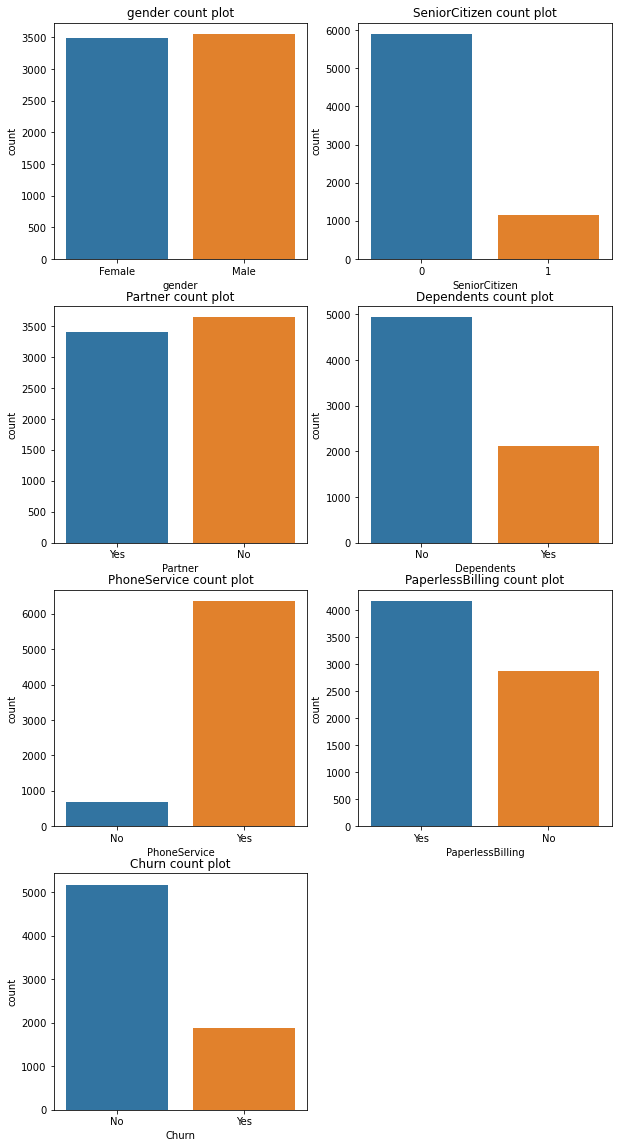

In [19]:
  a=4
  b=2
  c=1
  fig = plt.figure(figsize=(10,20))

  for i, col in enumerate(binary_cols):    
      plt.subplot(a, b, c)
      plt.title(col +' count plot') 
      sns.countplot(x =col, data =TeleChurn)
      c = c + 1

Insights from above count plot.
1.   The Features **"gender" and "Partner" are balanced** while it is observed that there is large **imbalance in the features "Senior Citizens" and "Phone service".**
2.   There are less customers with No phone service and also less number of senior citizen customers.


**Let's check the distribution of continuous variables**

In [20]:
Numeric_df = TeleChurn.select_dtypes(include=['int64','float64']).copy()

In [21]:
Numeric_df

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65
...,...,...,...,...
7038,0,24,84.80,1990.50
7039,0,72,103.20,7362.90
7040,0,11,29.60,346.45
7041,1,4,74.40,306.60


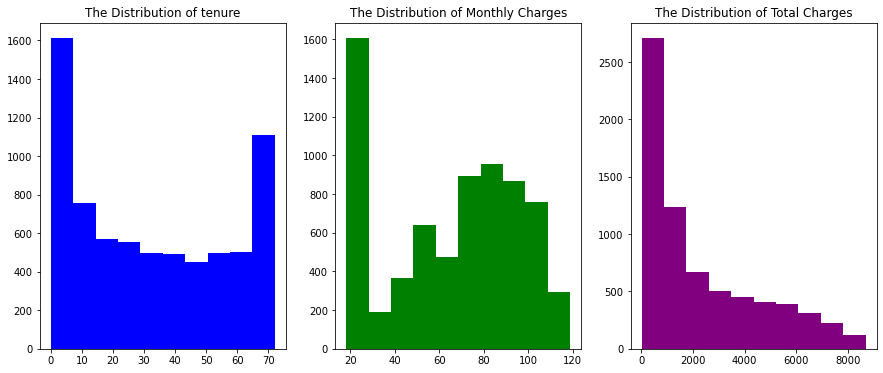

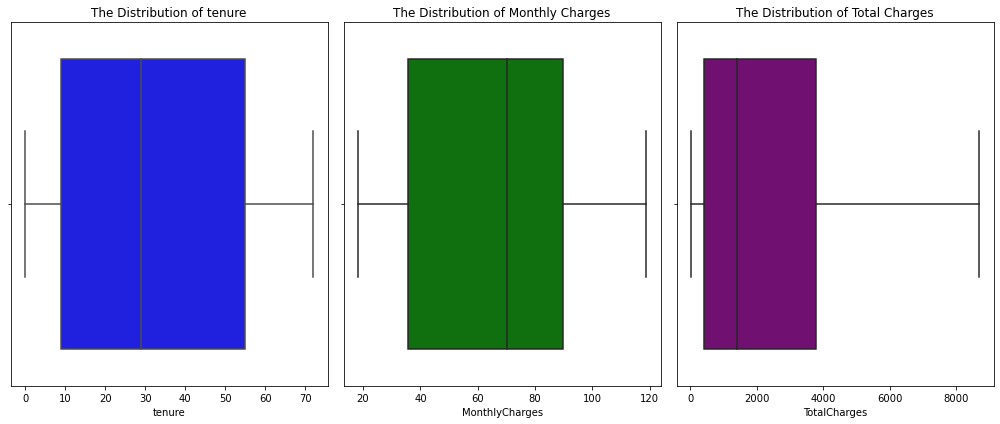

In [22]:
fig = plt.figure(figsize = (15,6))

ra1 = fig.add_subplot(1,3,1) 
ra2 = fig.add_subplot(1,3,2)
ra3 = fig.add_subplot(1,3,3)

ra1.hist(Numeric_df['tenure'],color = 'blue')
ra1.set_title('The Distribution of tenure')

ra2.hist(Numeric_df['MonthlyCharges'],color = 'green')
ra2.set_title('The Distribution of Monthly Charges')

ra3.hist(Numeric_df['TotalCharges'],color = 'purple')
ra3.set_title('The Distribution of Total Charges')

plt.figure(figsize=(14,6))
# subplot 1
plt.subplot(1, 3, 1)
plt.title('The Distribution of tenure')
sns.boxplot(Numeric_df['tenure'],orient='vertical',color= 'blue')

# subplot 2
plt.subplot(1, 3, 2)
plt.title('The Distribution of Monthly Charges')
sns.boxplot(Numeric_df['MonthlyCharges'],color='green')

plt.subplot(1, 3, 3)
plt.title('The Distribution of Total Charges')
sns.boxplot(Numeric_df['TotalCharges'],orient='vertical',color= 'purple')

plt.tight_layout() 
plt.show()


The Distribution of **'Tenure'** is **right skewed** and the plot is **bimodal**, showing maximum tenure opted is in the **range 0 to 5 and 65 to 70**.

The Distribution of **'Monthly Charges'** is **left skewed** and **maximum** monthly charge is in the **range 20 to 30**.

The Distribution of **'TotalCharges'** is **right skewed** and **maximum** monthly charge is in the **range 0 to 1000**.

<AxesSubplot:title={'center':'Bar graph -SeniorCitizen '}>

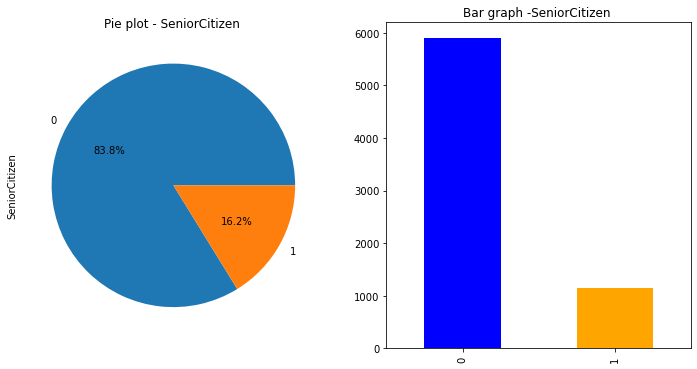

In [23]:
fig = plt.figure(figsize = (12,6))

plt.subplot(1, 2, 1)
plt.title('Pie plot - SeniorCitizen ')
Numeric_df['SeniorCitizen'].value_counts().plot.pie(autopct='%1.1f%%')

plt.subplot(1, 2, 2)
plt.title('Bar graph -SeniorCitizen ')
Numeric_df['SeniorCitizen'].value_counts().plot(color = ['blue','orange'],kind='bar')

There are less customers who are Senior Citizens members.

### **Bivariate Analysis**

**Let's observe the number of Male and Female who Churn (Relation between gender and churn rate)**

Similarly let's check the realtion between other categorical variables and churn rate.

<AxesSubplot:title={'center':'Relation between Dependents and churn rate'}, xlabel='Dependents', ylabel='count'>

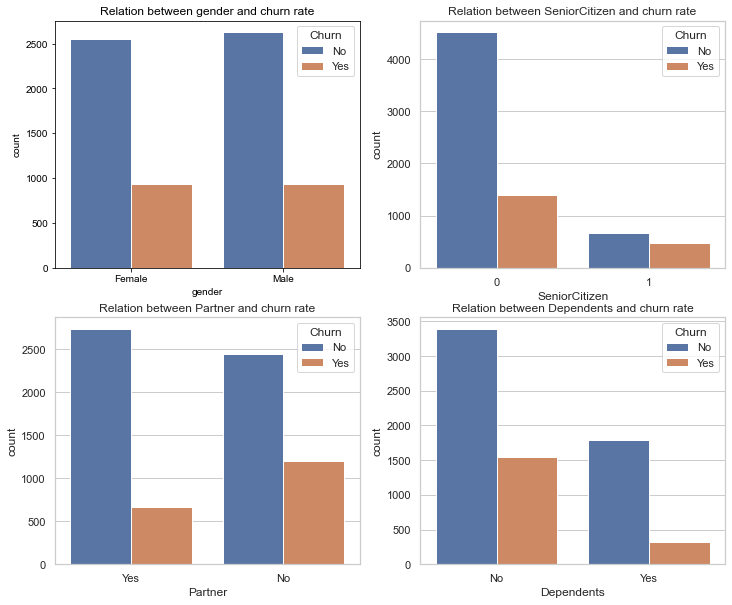

In [24]:
fig = plt.figure(figsize = (12,10))

plt.subplot(2, 2, 1)
plt.title('Relation between gender and churn rate')

sns.set(style="whitegrid", color_codes=True)
sns.countplot(x="gender", hue= "Churn", data=TeleChurn)

plt.subplot(2, 2, 2)
plt.title('Relation between SeniorCitizen and churn rate')

sns.set(style="whitegrid", color_codes=True)
sns.countplot(x="SeniorCitizen", hue= "Churn", data=TeleChurn)

plt.subplot(2, 2, 3)
plt.title('Relation between Partner and churn rate')

sns.set(style="whitegrid", color_codes=True)
sns.countplot(x="Partner", hue= "Churn", data=TeleChurn)

plt.subplot(2, 2, 4)
plt.title('Relation between Dependents and churn rate')

sns.set(style="whitegrid", color_codes=True)
sns.countplot(x="Dependents", hue= "Churn", data=TeleChurn)

From the above bar graphs **it is observed that there is no realtion between the Churn rate and independent features** such as 'gender', 'Partner', 'Dependents' and 'Senior Citizens'.

**Let's observe the Relation between Contract and tenure.**

In [25]:
print(TeleChurn[['Contract','tenure']].groupby('Contract').mean())

                   tenure
Contract                 
Month-to-month  18.036645
One year        42.044807
Two year        56.735103


It can be clearly seen that the customers who are in long duration contract has more tenure. **Thus contract and tenure are highly related features.**

**Let's observe the relation between the customers who has Multiple Lines and their Churn rate.**

In [26]:
pd.crosstab(TeleChurn['MultipleLines'],TeleChurn['Churn'])

Churn,No,Yes
MultipleLines,,
No,2541,849
No phone service,512,170
Yes,2121,850


There are 2541 customers who do not have Multiple Lines and out of which 849 has Churn.

There are 2121 customers who has Multiple Lines and out of which 850 has Churn.

So a clear conlclusion can't be drawn about the customers who will Churn.

In [27]:
# Let's create a crosstab for categorical features to observe their impact on churn rate.

columns =['InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']
for cols in columns:
  print('The relation between the customers who has',cols,'and their Churn rate.')
  print(pd.crosstab(TeleChurn[cols],TeleChurn['Churn']))
  print("\n")

The relation between the customers who has InternetService and their Churn rate.
Churn              No   Yes
InternetService            
DSL              1962   459
Fiber optic      1799  1297
No               1413   113


The relation between the customers who has OnlineSecurity and their Churn rate.
Churn                  No   Yes
OnlineSecurity                 
No                   2037  1461
No internet service  1413   113
Yes                  1724   295


The relation between the customers who has OnlineBackup and their Churn rate.
Churn                  No   Yes
OnlineBackup                   
No                   1855  1233
No internet service  1413   113
Yes                  1906   523


The relation between the customers who has DeviceProtection and their Churn rate.
Churn                  No   Yes
DeviceProtection               
No                   1884  1211
No internet service  1413   113
Yes                  1877   545


The relation between the customers who has TechSupp

**Findings from Crosstab**

*   It is observed that customers who has opted for **fiber optic internet service has more churn rate.**
*   Customers who **do not have online security, online backup, Device Protection and Tech support also has high churn rate.**
*   **Streaming Tv and Streaming Movies do not impact** the Churn rate
*   Those Customers who have **month to month contract churn more.**
*  Customers opted for **paperless billing also has high Churn** rate.
*   Customers who are paying through **electonic check has high churn.**

## **Multivariate Analysis**

Perform Correlation analysis with Insights.

In [28]:
#Observe the association of each independent variable with target variable 
# and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.

corr = TeleChurn.corr()
corr

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,0.220173,0.102652
tenure,0.016567,1.000000,0.247900,0.825464
MonthlyCharges,0.220173,0.247900,1.000000,0.650864
TotalCharges,0.102652,0.825464,0.650864,1.000000


**Pearson's Correlation Coefficient:** helps you find out the relationship between two quantities. It gives you the measure of the strength of association between two variables. The value of Pearson's Correlation Coefficient can be between -1 to +1. 1 means that they are highly correlated and 0 means no correlation.

**A heat map** is a two-dimensional representation of information with the help of colors. Heat maps can help the user visualize simple or complex information.

<AxesSubplot:>

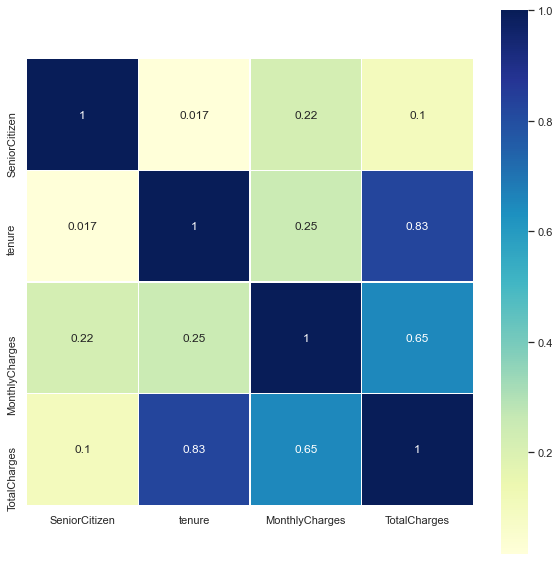

In [29]:
# Plot the correlation between each feature using seaborn heatmap function.
colormap = plt.cm.YlGnBu
#colormap = plt.cm.viridis
plt.figure(figsize=(10,10))
sns.heatmap(corr,square=True, cmap=colormap, linecolor='white',linewidths=0.2, annot=True)

*   The features **"Tenure" and "TotalCharges" has high correlation with correlation factor 0.83.**
*   Also there is moderate correlation between MonthlyCharges and Total Charges.

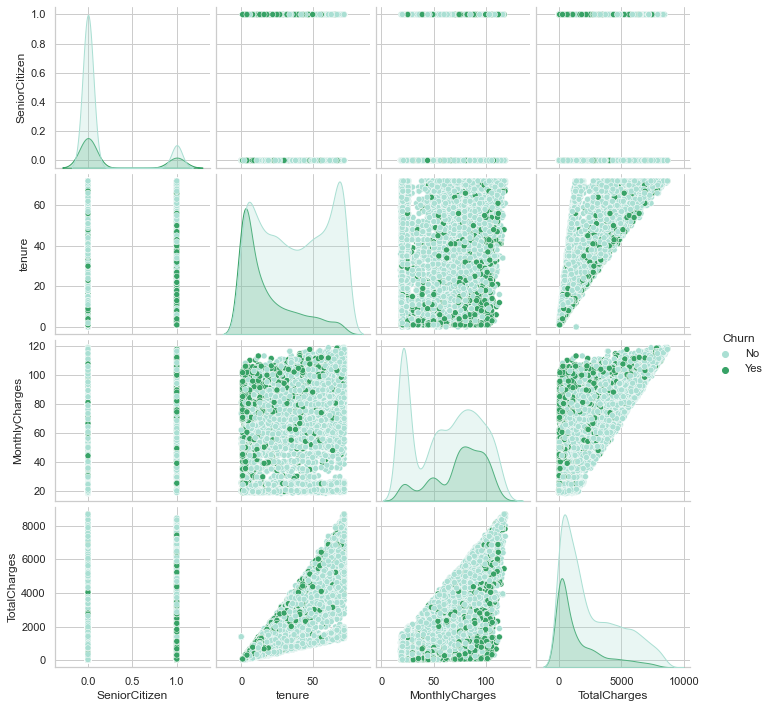

In [30]:
# Use pairplot to plot the distribution of each variable.
colormap= sns.color_palette("BuGn", 2)
sns.pairplot(TeleChurn, hue = 'Churn',palette=colormap, diag_kind = 'kde')

There seems to have a correlation of the Monthly Charges and Total Charge. We observe that the total charges increases as the monthly bill for a customer increases.

# **4. Data pre-processing:** 
• Segregate predictors vs target attributes

• Check for target balancing and fix it if found imbalanced.

• Perform train-test split.

• Check if the train and test data have similar statistical characteristics when compared with original data.

In [31]:
TeleChurn.Churn.replace(['Yes','No'],[1,0],inplace=True)

In [32]:
#Dropping the column 'CustomerId' as it is not an important feature
TeleChurn.drop(['customerID'],inplace = True, axis =1)

In [33]:
TeleChurn_Copy = TeleChurn.copy(deep=True) # Create a copy of original dataset.

### **Let's do statistical analysis to check the hypothesis to accept or reject the numerical features**

In [34]:
from scipy.stats import ttest_ind,ttest_1samp

Grp1=TeleChurn_Copy[TeleChurn['Churn'] == 0]
Grp2=TeleChurn_Copy[TeleChurn['Churn'] == 1]

for i in Numeric_df:
  t_statistic, p_value = ttest_ind(Grp1[i], Grp2[i])
  print('t_statistic and p_value of {} : {} and {}'.format(i,t_statistic, p_value) )

  if p_value < 0.05:  # Setting our significance level at 5%
        print('Rejecting Null Hypothesis: Customer who Churn and who do not Churn does NOT have same distribution of {}'.format(i))
        print('\n')
  else:
        print('Fail to Reject Null Hypothesis: Customer who Churn and who do not Churn have same distribution of {}'.format(i))
        print('\n')

t_statistic and p_value of SeniorCitizen : -12.80786572603475 and 3.8398600557847846e-37
Rejecting Null Hypothesis: Customer who Churn and who do not Churn does NOT have same distribution of SeniorCitizen


t_statistic and p_value of tenure : 31.57955051135377 and 7.99905796059022e-205
Rejecting Null Hypothesis: Customer who Churn and who do not Churn does NOT have same distribution of tenure


t_statistic and p_value of MonthlyCharges : -16.53673801593631 and 2.706645606888261e-60
Rejecting Null Hypothesis: Customer who Churn and who do not Churn does NOT have same distribution of MonthlyCharges


t_statistic and p_value of TotalCharges : 17.04229535246348 and 7.508609056708869e-64
Rejecting Null Hypothesis: Customer who Churn and who do not Churn does NOT have same distribution of TotalCharges




### **Carrying out Hypothesis Testing for categorical variables.**

In [35]:
# Create a dataframe of Categorical variables by seperating these features from the dataset.
obj_df = TeleChurn.select_dtypes(include=['object']).copy()
obj_df.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic)
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check


In [36]:
# Check for null values
obj_df[obj_df.isnull().any(axis=1)]

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod


**There are No null values in object data type.**

### **Hypothesis Testing for categorical variables**

In [37]:
import scipy.stats as stats

for i in obj_df:
  crosstab=pd.crosstab(TeleChurn_Copy['Churn'],TeleChurn_Copy[i])
  chi_sq_Stat, p_value, deg_freedom, exp_freq = stats.chi2_contingency(crosstab)

  print('Chi-square statistic: %3.5f , P value:  %1.6f' %(chi_sq_Stat, p_value))

  if p_value < 0.05:  # Setting our significance level at 5%
        print('Rejecting Null Hypothesis: Customer who Churn and who do not Churn does NOT have same distribution of {}'.format(i))
        print('\n')
  else:
        print('Fail to Reject Null Hypothesis: Customer who Churn and who do not Churn have same distribution of {}'.format(i))
        print('\n')

Chi-square statistic: 0.48408 , P value:  0.486579
Fail to Reject Null Hypothesis: Customer who Churn and who do not Churn have same distribution of gender


Chi-square statistic: 158.73338 , P value:  0.000000
Rejecting Null Hypothesis: Customer who Churn and who do not Churn does NOT have same distribution of Partner


Chi-square statistic: 189.12925 , P value:  0.000000
Rejecting Null Hypothesis: Customer who Churn and who do not Churn does NOT have same distribution of Dependents


Chi-square statistic: 0.91503 , P value:  0.338783
Fail to Reject Null Hypothesis: Customer who Churn and who do not Churn have same distribution of PhoneService


Chi-square statistic: 11.33044 , P value:  0.003464
Rejecting Null Hypothesis: Customer who Churn and who do not Churn does NOT have same distribution of MultipleLines


Chi-square statistic: 732.30959 , P value:  0.000000
Rejecting Null Hypothesis: Customer who Churn and who do not Churn does NOT have same distribution of InternetService


Ch

From above Hypothesis testing, we clearly understand that the categorical variables **'gender' and 'PhoneService'** have no significant contribution in distiguishing Churn and Non Churn Customers. Hence **these features can be dropped**.

Also from **Bivariate analysis it is observed that Contract and Tenure are related** to each other hence we can **drop the 'Contract' feature.**

**From Correlation matrix** we can observe that the 'tenure' and 'TotalCharges' are highly correlated, so **let's drop 'TotalCharges' feature.**

In [38]:
TeleChurn_Copy.drop(['gender','PhoneService'],inplace = True, axis =1)

In [39]:
TeleChurn_Copy.drop(['Contract','TotalCharges'],inplace = True, axis =1)

**One hot encoding.**

Categorical features need to be converted to numbers so that they can be included in calculations done by a machine learning model. The categorical variables in our data set are not ordinal (i.e. there is no order in them). For example, “DSL” internet service is not superior to “Fiber optic” internet service. 

When we encode the categorical variables, a number will be assigned to each category. The category with higher numbers will be considered more important or effect the model more. Therefore, we need to do encode the variables in a way that each category will be represented by a column and the value in that column will be 0 or 1.


In [40]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

cols = ['SeniorCitizen', 'Partner', 'Dependents', 'PaperlessBilling']

X = pd.get_dummies(TeleChurn_Copy, columns=cols, drop_first=True)

In [41]:
cleanup_nums = {"MultipleLines": {"No phone service": 0, "No": 1, "Yes": 2},
                "InternetService":{"No": 0, "DSL": 1, "Fiber optic": 2},
                "OnlineSecurity" :{"No" : 0, "No internet service" : 1, "Yes": 2},
                "OnlineBackup" :{"No" : 0, "No internet service" : 1, "Yes": 2},
                "DeviceProtection" :{"No" : 0, "No internet service" : 1, "Yes": 2},
                "TechSupport" :{"No" : 0, "No internet service" : 1, "Yes": 2},
                "StreamingTV" :{"No" : 0, "No internet service" : 1, "Yes": 2},
                "StreamingMovies" :{"No" : 0, "No internet service" : 1, "Yes": 2},
                "PaymentMethod" : {'Electronic check': 1, 'Mailed check' : 2, 'Bank transfer (automatic)': 3,'Credit card (automatic)':4},
                "Contract" : {'Month-to-month' : 0, 'One year': 1, 'Two year':2}}
X = X.replace(cleanup_nums)
X.head()


,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaymentMethod,MonthlyCharges,Churn,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PaperlessBilling_Yes
0,1,0,1,0,2,0,0,0,0,1,29.85,0,0,1,0,1
1,34,1,1,2,0,2,0,0,0,2,56.95,0,0,0,0,0
2,2,1,1,2,2,0,0,0,0,2,53.85,1,0,0,0,1
3,45,0,1,2,0,2,2,0,0,3,42.30,0,0,0,0,0
4,2,1,2,0,0,0,0,0,0,1,70.70,1,0,0,0,1


In [42]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tenure                7043 non-null   int64  
 1   MultipleLines         7043 non-null   int64  
 2   InternetService       7043 non-null   int64  
 3   OnlineSecurity        7043 non-null   int64  
 4   OnlineBackup          7043 non-null   int64  
 5   DeviceProtection      7043 non-null   int64  
 6   TechSupport           7043 non-null   int64  
 7   StreamingTV           7043 non-null   int64  
 8   StreamingMovies       7043 non-null   int64  
 9   PaymentMethod         7043 non-null   int64  
 10  MonthlyCharges        7043 non-null   float64
 11  Churn                 7043 non-null   int64  
 12  SeniorCitizen_1       7043 non-null   uint8  
 13  Partner_Yes           7043 non-null   uint8  
 14  Dependents_Yes        7043 non-null   uint8  
 15  PaperlessBilling_Yes 

Now we have converted all the features as Numerical features that can be used to create model.

**Let's perform scaling on continuous variables.**

We also need to scale continuous variables. Otherwise, variables with higher values will be given more importance which effects the accuracy of the model.

In [43]:
cols=['tenure',	'MonthlyCharges']

scaler = MinMaxScaler()

X['tenure'] = scaler.fit_transform(X[['tenure']])
X['MonthlyCharges'] = scaler.fit_transform(X[['MonthlyCharges']])

### **Let's Check the distribution of Target variable "Churn" plot it to check target balancing**

In [44]:
binary_cols.remove('Churn')

In [45]:
TeleChurn['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

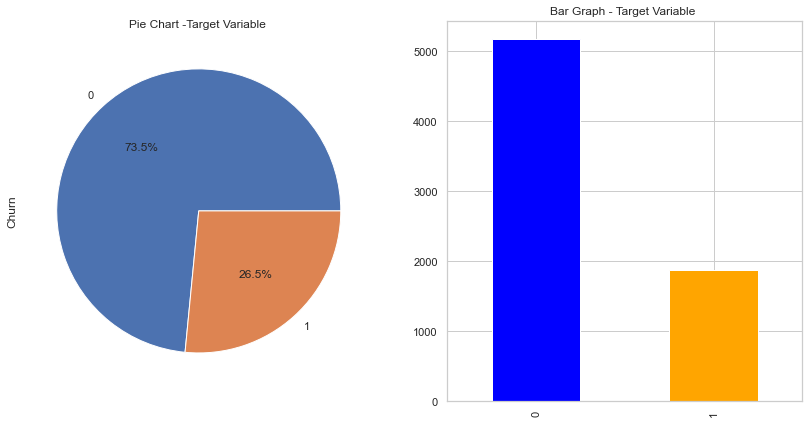

In [46]:
fig,axes=plt.subplots(1,2,figsize=(14,7))
TeleChurn['Churn'].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[0])
TeleChurn.Churn.value_counts().plot(color = ['blue','orange'],kind='bar',ax=axes[1])
axes[0].set_title('Pie Chart -Target Variable ')
axes[1].set_title('Bar Graph - Target Variable ')
plt.show()

**A bar plot and value counts above revealed that the target variable is highly unbalanced, with nearly most customers have not Churn.**

## **Target Balancing**

*   **Up-sampling is the process of randomly duplicating observations from the minority class in order to reinforce its signal.**
*   There are several heuristics for doing so, but the most common way is to simply resample with replacement.
*  We'll create a new DataFrame with an up-sampled minority class. 

The steps are:

1.   Separate observations from each class into different DataFrames.
2.   Resample the minority class with replacement, setting the number of samples to match that of the majority class.
3.   Combine the up-sampled minority class DataFrame with the original majority class DataFrame.


*  the new DataFrame has more observations than the original, and the ratio of the two classes is now 1:1.










In [47]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = X[X.Churn==0]
df_minority = X[X.Churn==1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=5174,    # to match majority class
                                 random_state=12) # reproducible results
 
# Combine majority class with upsampled minority class
X_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
X_upsampled.Churn.value_counts()

0    5174
1    5174
Name: Churn, dtype: int64

In [48]:
X_upsampled.head()

,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaymentMethod,MonthlyCharges,Churn,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PaperlessBilling_Yes
0,0.013889,0,1,0,2,0,0,0,0,1,0.115423,0,0,1,0,1
1,0.472222,1,1,2,0,2,0,0,0,2,0.385075,0,0,0,0,0
3,0.625000,0,1,2,0,2,2,0,0,3,0.239303,0,0,0,0,0
6,0.305556,2,2,0,2,0,0,2,0,4,0.704975,0,0,0,1,1
7,0.138889,0,1,2,0,0,0,0,0,2,0.114428,0,0,0,0,0


**Thus the data is balanced using resampling technique and we can see 5174 samples in eact class of the target variable.** 

### **Segregate predictors vs target attributes**

In [49]:
# Seperating features from target variable.

X_sm = X_upsampled.drop('Churn',axis = 1) #features (independent variables)
y_sm = X_upsampled['Churn']  #target (dependent variable)

### **Perform train-test split.**

In [50]:
# Splitting the data into training and testing set.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size = 0.3, random_state = 1)

**• Check if the train and test data have similar statistical characteristics when compared with original data.**

In [51]:
X_train.shape

(7243, 15)

In [52]:
X_test.shape

(3105, 15)

The **data cleaning is done on original dataset** to convert object datatypes into numerical by using one hot encoding technique, also **the scaling is performed on numerical features.**

In the original dataset there are 20 independent features and the following **independent features are dropped** from the original dataset after performing exploratory data analysis **(EDA)**:
 
*   CustomerID
*   gender
*   PhoneService
*   Contract
*   TotalCharges

Thus the dataset now has 15 independent features used for training and testing.

**Class imbalance is handled by resampling** the data using sampling with replacement.

**We have splitted the dataset into train and test** data set with 70% data as training set and 30% in test dataset.

**ORIGINAL DATASET: 7043 samples.**

**Train set : 7243 samples**

**Test Set : 3105 samples.** 


# **5. Model training, testing and tuning:** 
• Train and test all ensemble models taught in the learning module.

• Suggestion: Use standard ensembles available. Also you can design your own ensemble technique using weak classifiers.

• Display the classification accuracies for train and test data.

• Apply all the possible tuning techniques to train the best model for the given data.

• Suggestion: Use all possible hyper parameter combinations to extract the best accuracies.

• Display and compare all the models designed with their train and test accuracies.

• Select the final best trained model along with your detailed comments for selecting this model.

• Pickle the selected model for future use.

## **Decision tree Classifier:**

Decision trees are constructed via an algorithmic approach that identifies ways to split a data set based on different conditions. It is one of the most widely used and practical methods for supervised learning. Decision Trees are a non-parametric supervised learning method used for both classification and regression tasks.

In [53]:
# Defining a function to generate classification report and print model accuracy and confusion matrix 
# for each type of model on train and test data.

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import time
sns.set_style('darkgrid')
%matplotlib inline

def evaluate(model, X_train, X_test, y_train, y_test, duration):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print('{}'.format('\033[1m'))
    print("TRAINIG RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")
    print("\n")

    print("TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")
    print("\n")
    print("TIME ELAPSED : ", duration)

In [54]:
# invoking the decision tree classifier function. Using 'entropy' method of finding the split columns. Other option 
# could be gini index.  Restricting the depth of the tree to 5 (no particular reason for selecting this)
from sklearn.tree import DecisionTreeClassifier

start = time.time()

model_entropy=DecisionTreeClassifier(criterion='entropy')
model_entropy.fit(X_train, y_train)

end = time.time()  #note the end time
    
duration = end - start  # calculate the total duration

print("MODEL : Decision Tree \n")
evaluate(model_entropy, X_train, X_test, y_train, y_test,duration)



MODEL : Decision Tree 


TRAINIG RESULTS: 
CONFUSION MATRIX:
[[3601   13]
 [   7 3622]]
ACCURACY SCORE:
0.9972
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.998060     0.996424  0.997239     0.997242      0.997240
recall        0.996403     0.998071  0.997239     0.997237      0.997239
f1-score      0.997231     0.997247  0.997239     0.997239      0.997239
support    3614.000000  3629.000000  0.997239  7243.000000   7243.000000


TESTING RESULTS: 
CONFUSION MATRIX:
[[1223  337]
 [  98 1447]]
ACCURACY SCORE:
0.8599
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.925814     0.811099  0.859903     0.868456      0.868733
recall        0.783974     0.936570  0.859903     0.860272      0.859903
f1-score      0.849011     0.869330  0.859903     0.859170      0.859121
support    1560.000000  1545.000000  0.859903  3105.000000   3105.000000


TIME ELAPSED :  0.03700

In [55]:
scores = {
    'Decision Tree': {
        'Train': accuracy_score(y_train, model_entropy.predict(X_train)),
        'Test': accuracy_score(y_test, model_entropy.predict(X_test)),
    },
}

**Pruning Decision Tree Classifier:**

Overfitting is one of the major problem for every model in machine learning. If model is overfitted it will poorly generalized to new samples. To avoid decision tree from overfitting we remove the branches that make use of features having low importance. This method is called as Pruning or post-pruning. This way we will reduce the complexity of tree, and hence imroves predictive accuracy by the reduction of overfitting.

In [56]:
clf_pruned = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
start = time.time()
clf_pruned.fit(X_train, y_train)

end = time.time()  #note the end time
    
duration = end - start  # calculate the total duration
print("MODEL : Pruned Decision Tree \n")

evaluate(clf_pruned, X_train, X_test, y_train, y_test,duration)

MODEL : Pruned Decision Tree 


TRAINIG RESULTS: 
CONFUSION MATRIX:
[[2506 1108]
 [ 810 2819]]
ACCURACY SCORE:
0.7352
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.755730     0.717851  0.735193     0.736790      0.736751
recall        0.693414     0.776798  0.735193     0.735106      0.735193
f1-score      0.723232     0.746162  0.735193     0.734697      0.734721
support    3614.000000  3629.000000  0.735193  7243.000000   7243.000000


TESTING RESULTS: 
CONFUSION MATRIX:
[[1122  438]
 [ 374 1171]]
ACCURACY SCORE:
0.7385
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.750000     0.727781  0.738486     0.738891      0.738944
recall        0.719231     0.757929  0.738486     0.738580      0.738486
f1-score      0.734293     0.742549  0.738486     0.738421      0.738401
support    1560.000000  1545.000000  0.738486  3105.000000   3105.000000


TIME ELAPSED :  

When the tree is regularaised, overfitting is reduced, but there is no increase in accuracy

In [57]:
scores = {
    'Decision Tree Pruned': {
        'Train': accuracy_score(y_train, clf_pruned.predict(X_train)),
        'Test': accuracy_score(y_test, clf_pruned.predict(X_test)),
    },
}

In [58]:
from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
from os import system
from sklearn.tree import export_graphviz 
from IPython.display import Image  
import graphviz

xvar = X_sm
feature_cols = xvar.columns

In [59]:
## Calculating feature importance

feat_importance = clf_pruned.tree_.compute_feature_importances(normalize=False)

feat_imp_dict = dict(zip(feature_cols, clf_pruned.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.sort_values(by=0, ascending=False)

,0
TechSupport,0.504020
tenure,0.265204
InternetService,0.230776
MultipleLines,0.000000
OnlineSecurity,0.000000
OnlineBackup,0.000000
DeviceProtection,0.000000
StreamingTV,0.000000
StreamingMovies,0.000000
PaymentMethod,0.000000


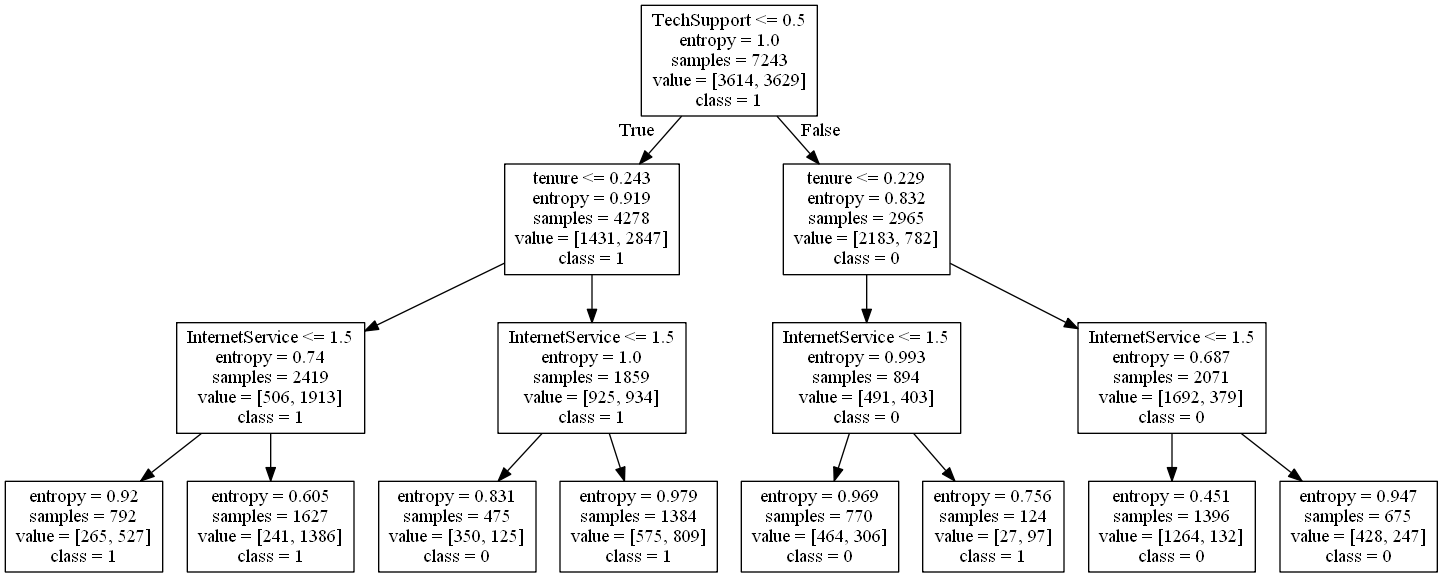

In [60]:
df1_Tree_File = open('Churn_tree.dot','w')
dot_data = tree.export_graphviz(clf_pruned, out_file=df1_Tree_File, feature_names = feature_cols, class_names = ['0','1'])

df1_Tree_File.close()

system("dot -Tpng Churn_tree.dot -o Churn_tree.png")
display(Image("Churn_tree.png"))


From the feature importance dataframe we can infer that Tech Support, tenure and Internet Service features has impact on the Churn variable.

## **Bagging Algorithms**

Bootstrap Aggregation or bagging involves taking multiple samples from your training dataset (with replacement) and training a model for each sample.

The final output prediction is averaged across the predictions of all of the sub-models.

**BaggingClassifier:**

A Bagging classifier is an ensemble meta-estimator that fits base classifiers each on random subsets of the original dataset and then aggregate their individual predictions (either by voting or by averaging) to form a final prediction. Such a meta-estimator can typically be used as a way to reduce the variance of a black-box estimator (e.g., a decision tree), by introducing randomization into its construction procedure and then making an ensemble out of it.

If samples are drawn with replacement, then the method is known as Bagging. 

In [61]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
bagging_clf = BaggingClassifier(base_estimator=tree, n_estimators=1500, random_state=42)
start = time.time()

bagging_clf.fit(X_train, y_train)

end = time.time()  #note the end time
    
duration = end - start  # calculate the total duration
print("MODEL :Bagging Classifier \n")
evaluate(bagging_clf, X_train, X_test, y_train, y_test,duration)

MODEL :Bagging Classifier 


TRAINIG RESULTS: 
CONFUSION MATRIX:
[[3599   15]
 [   5 3624]]
ACCURACY SCORE:
0.9972
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.998613     0.995878  0.997239     0.997245      0.997242
recall        0.995849     0.998622  0.997239     0.997236      0.997239
f1-score      0.997229     0.997248  0.997239     0.997239      0.997239
support    3614.000000  3629.000000  0.997239  7243.000000   7243.000000


TESTING RESULTS: 
CONFUSION MATRIX:
[[1286  274]
 [  81 1464]]
ACCURACY SCORE:
0.8857
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.940746     0.842348  0.885668     0.891547      0.891785
recall        0.824359     0.947573  0.885668     0.885966      0.885668
f1-score      0.878715     0.891867  0.885668     0.885291      0.885260
support    1560.000000  1545.000000  0.885668  3105.000000   3105.000000


TIME ELAPSED :  25.

In [62]:
scores = {
    'Bagging Classifier': {
        'Train': accuracy_score(y_train, bagging_clf.predict(X_train)),
        'Test': accuracy_score(y_test, bagging_clf.predict(X_test)),
    },
}

## **Random Forest:**

A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

The sub-sample size is always the same as the original input sample size but the samples are drawn with replacement if bootstrap=True (default).

In [63]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42, n_estimators=1000)
start = time.time()

rf_clf.fit(X_train, y_train)

end = time.time()  #note the end time
    
duration = end - start  # calculate the total duration
print("MODEL :Random Forest \n")
evaluate(rf_clf, X_train, X_test, y_train, y_test,duration)

MODEL :Random Forest 


TRAINIG RESULTS: 
CONFUSION MATRIX:
[[3599   15]
 [   5 3624]]
ACCURACY SCORE:
0.9972
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.998613     0.995878  0.997239     0.997245      0.997242
recall        0.995849     0.998622  0.997239     0.997236      0.997239
f1-score      0.997229     0.997248  0.997239     0.997239      0.997239
support    3614.000000  3629.000000  0.997239  7243.000000   7243.000000


TESTING RESULTS: 
CONFUSION MATRIX:
[[1299  261]
 [  83 1462]]
ACCURACY SCORE:
0.8892
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.939942     0.848520  0.889211     0.894231      0.894452
recall        0.832692     0.946278  0.889211     0.889485      0.889211
f1-score      0.883073     0.894737  0.889211     0.888905      0.888877
support    1560.000000  1545.000000  0.889211  3105.000000   3105.000000


TIME ELAPSED :  7.113406

In [64]:
scores['Random Forest'] = {
        'Train': accuracy_score(y_train, rf_clf.predict(X_train)),
        'Test': accuracy_score(y_test, rf_clf.predict(X_test)),
    }

## **Boosting Algorithms**

Boosting ensemble algorithms creates a sequence of models that attempt to correct the mistakes of the models before them in the sequence.

Once created, the models make predictions which may be weighted by their demonstrated accuracy and the results are combined to create a final output prediction.

The two most common boosting ensemble machine learning algorithms are:

**AdaBoost**

**Stochastic Gradient Boosting** 

### **AdaBoost**

AdaBoost was perhaps the first successful boosting ensemble algorithm. It generally works by weighting instances in the dataset by how easy or difficult they are to classify, allowing the algorithm to pay or or less attention to them in the construction of subsequent models.

You can construct an AdaBoost model for classification using the AdaBoostClassifier class.

### **AdaBoost Classifier:**

An AdaBoost classifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent

In [65]:
from sklearn.ensemble import AdaBoostClassifier

ada_boost_clf = AdaBoostClassifier(n_estimators=30)
start = time.time()
ada_boost_clf.fit(X_train, y_train)

end = time.time()  #note the end time
    
duration = end - start  # calculate the total duration

print("MODEL : AdaBoost \n")
evaluate(ada_boost_clf, X_train, X_test, y_train, y_test,duration)

MODEL : AdaBoost 


TRAINIG RESULTS: 
CONFUSION MATRIX:
[[2691  923]
 [ 759 2870]]
ACCURACY SCORE:
0.7678
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.780000     0.756657  0.767776     0.768328      0.768304
recall        0.744604     0.790851  0.767776     0.767728      0.767776
f1-score      0.761891     0.773376  0.767776     0.767634      0.767646
support    3614.000000  3629.000000  0.767776  7243.000000   7243.000000


TESTING RESULTS: 
CONFUSION MATRIX:
[[1182  378]
 [ 343 1202]]
ACCURACY SCORE:
0.7678
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.775082     0.760759  0.767794     0.767921      0.767955
recall        0.757692     0.777994  0.767794     0.767843      0.767794
f1-score      0.766288     0.769280  0.767794     0.767784      0.767777
support    1560.000000  1545.000000  0.767794  3105.000000   3105.000000


TIME ELAPSED :  0.2550146579

In [66]:
scores['AdaBoost'] = {
        'Train': accuracy_score(y_train, ada_boost_clf.predict(X_train)),
        'Test': accuracy_score(y_test, ada_boost_clf.predict(X_test)),
    }

### **Gradient Boosting Classifier:**

GB builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions. In each stage n_classes_ regression trees are fit on the negative gradient of the binomial or multinomial deviance loss function. Binary classification is a special case where only a single regression tree is induced.

In [67]:
from sklearn.ensemble import GradientBoostingClassifier

grad_boost_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
start = time.time()
grad_boost_clf.fit(X_train, y_train)
end = time.time()  #note the end time
    
duration = end - start  # calculate the total duration
print("MODEL : Gradient Boost \n")
evaluate(grad_boost_clf, X_train, X_test, y_train, y_test,duration)

MODEL : Gradient Boost 


TRAINIG RESULTS: 
CONFUSION MATRIX:
[[2722  892]
 [ 614 3015]]
ACCURACY SCORE:
0.7921
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.815947     0.771692  0.792075     0.793820      0.793774
recall        0.753182     0.830807  0.792075     0.791995      0.792075
f1-score      0.783309     0.800159  0.792075     0.791734      0.791752
support    3614.000000  3629.000000  0.792075  7243.000000   7243.000000


TESTING RESULTS: 
CONFUSION MATRIX:
[[1164  396]
 [ 313 1232]]
ACCURACY SCORE:
0.7717
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.788084     0.756757  0.771659     0.772420      0.772496
recall        0.746154     0.797411  0.771659     0.771782      0.771659
f1-score      0.766546     0.776552  0.771659     0.771549      0.771525
support    1560.000000  1545.000000  0.771659  3105.000000   3105.000000


TIME ELAPSED :  0.8500

In [68]:
scores['Gradient Boosting'] = {
        'Train': accuracy_score(y_train, grad_boost_clf.predict(X_train)),
        'Test': accuracy_score(y_test, grad_boost_clf.predict(X_test)),
    }

### **XGBoost**
XGBoost is short for **“Extreme Gradient Boosting,”**  is an implementation of gradient boosted decision trees designed for speed and performance that is dominative competitive machine learning.

The main benefit of the XGBoost implementation is computational efficiency and often better model performance.

In [69]:
from xgboost import XGBClassifier

xg_boost_clf = XGBClassifier(n_estimators=100,eval_metric='logloss', random_state=42)
start = time.time()
xg_boost_clf.fit(X_train, y_train)
end = time.time()  #note the end time
    
duration = end - start  # calculate the total duration
print("MODEL : XGBoost \n")
evaluate(xg_boost_clf, X_train, X_test, y_train, y_test,duration)


MODEL : XGBoost 


TRAINIG RESULTS: 
CONFUSION MATRIX:
[[3289  325]
 [ 137 3492]]
ACCURACY SCORE:
0.9362
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.960012     0.914855  0.936214     0.937433      0.937386
recall        0.910072     0.962249  0.936214     0.936160      0.936214
f1-score      0.934375     0.937953  0.936214     0.936164      0.936168
support    3614.000000  3629.000000  0.936214  7243.000000   7243.000000


TESTING RESULTS: 
CONFUSION MATRIX:
[[1239  321]
 [ 162 1383]]
ACCURACY SCORE:
0.8444
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.884368     0.811620  0.844444     0.847994      0.848170
recall        0.794231     0.895146  0.844444     0.844688      0.844444
f1-score      0.836879     0.851339  0.844444     0.844109      0.844074
support    1560.000000  1545.000000  0.844444  3105.000000   3105.000000


TIME ELAPSED :  0.58203315734

In [70]:
scores['XG Boost'] = {
        'Train': accuracy_score(y_train, xg_boost_clf.predict(X_train)),
        'Test': accuracy_score(y_test, xg_boost_clf.predict(X_test)),
    }

### **LightGBM**
LightGBM, short for Light Gradient Boosted Machine, is a library developed at Microsoft that provides an efficient implementation of the gradient boosting algorithm.

The primary benefit of the LightGBM is the changes to the training algorithm that make the process dramatically faster, and in many cases, result in a more effective model.

In [71]:
from lightgbm import LGBMClassifier

lgbm_boost_clf = LGBMClassifier(n_estimators=100, random_state=42)
start = time.time()
lgbm_boost_clf.fit(X_train, y_train)
end = time.time()  #note the end time
    
duration = end - start  # calculate the total duration
print("MODEL :LightGBM \n")
evaluate(lgbm_boost_clf, X_train, X_test, y_train, y_test,duration)

MODEL :LightGBM 


TRAINIG RESULTS: 
CONFUSION MATRIX:
[[2987  627]
 [ 292 3337]]
ACCURACY SCORE:
0.8731
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.910948     0.841826  0.873119     0.876387      0.876316
recall        0.826508     0.919537  0.873119     0.873023      0.873119
f1-score      0.866676     0.878967  0.873119     0.872822      0.872835
support    3614.000000  3629.000000  0.873119  7243.000000   7243.000000


TESTING RESULTS: 
CONFUSION MATRIX:
[[1201  359]
 [ 244 1301]]
ACCURACY SCORE:
0.8058
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.831142     0.783735  0.805797     0.807438      0.807553
recall        0.769872     0.842071  0.805797     0.805971      0.805797
f1-score      0.799334     0.811856  0.805797     0.805595      0.805565
support    1560.000000  1545.000000  0.805797  3105.000000   3105.000000


TIME ELAPSED :  0.13800787925

In [72]:
scores['LightGBM'] = {
        'Train': accuracy_score(y_train, lgbm_boost_clf.predict(X_train)),
        'Test': accuracy_score(y_test, lgbm_boost_clf.predict(X_test)),
    }

### **CatBoost**
CatBoost is a third-party library developed at Yandex that provides an efficient implementation of the gradient boosting algorithm.

The primary benefit of the CatBoost (in addition to computational speed improvements) is support for categorical input variables. This gives the library its name CatBoost for “Category Gradient Boosting.”

In [73]:
from catboost import CatBoostClassifier

cat_boost_clf = CatBoostClassifier(verbose=0, n_estimators=100, random_state=42)
start = time.time()
cat_boost_clf.fit(X_train, y_train)
end = time.time()  #note the end time
    
duration = end - start  # calculate the total duration
print("MODEL :CatBoost \n")
evaluate(cat_boost_clf, X_train, X_test, y_train, y_test,duration)

MODEL :CatBoost 


TRAINIG RESULTS: 
CONFUSION MATRIX:
[[2856  758]
 [ 490 3139]]
ACCURACY SCORE:
0.8277
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.853556     0.805491  0.827696     0.829524      0.829474
recall        0.790260     0.864977  0.827696     0.827618      0.827696
f1-score      0.820690     0.834175  0.827696     0.827432      0.827446
support    3614.000000  3629.000000  0.827696  7243.000000   7243.000000


TESTING RESULTS: 
CONFUSION MATRIX:
[[1191  369]
 [ 298 1247]]
ACCURACY SCORE:
0.7852
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.799866     0.771658  0.785185     0.785762      0.785830
recall        0.763462     0.807120  0.785185     0.785291      0.785185
f1-score      0.781240     0.788991  0.785185     0.785115      0.785097
support    1560.000000  1545.000000  0.785185  3105.000000   3105.000000


TIME ELAPSED :  0.81204628944

In [74]:
scores['CatBoost'] = {
        'Train': accuracy_score(y_train, cat_boost_clf.predict(X_train)),
        'Test': accuracy_score(y_test, cat_boost_clf.predict(X_test)),
    }

<AxesSubplot:>

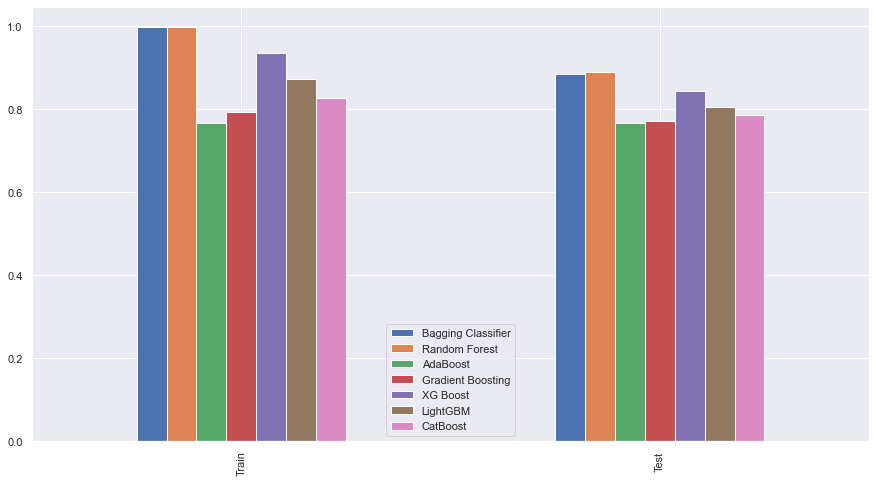

In [75]:
scores_df = pd.DataFrame(scores)

scores_df.plot(kind='bar', figsize=(15, 8))

In [76]:
from sklearn.metrics import f1_score
def fit_n_print(model, X_train, X_test, y_train, y_test):  # take the model, train data and test data as input
    
    start = time.time()  # note the start time 

    model.fit(X_train, y_train)   # fit the model using the train data

    pred = model.predict(X_test)     # model predictions on the test data

    acc = accuracy_score(y_test, pred)
    f1 = f1_score(y_test, pred, average ='weighted')  # calculate the f1 score value on the test data
     
    scorer = {'acc' : metrics.make_scorer(metrics.accuracy_score),
              'f1_Score' : metrics.make_scorer(metrics.f1_score),
              }    # make scorers to be used in cross validation
    
    cv = cross_validate(model, X_train, y_train, cv=10, scoring = scorer)   # perform cross validation accross 3 metrics
    
    end = time.time()  #note the end time  
    
    duration = end - start  # calculate the total duration
    
    return acc, f1, duration, pred  # return all the metrics along with predictions

In [77]:
# methods and classes for evaluation
from sklearn import metrics
from sklearn.model_selection import cross_validate
import time

In [78]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

dt = DecisionTreeClassifier(random_state=2)   
br = BaggingClassifier(random_state=2)
rf = RandomForestClassifier(random_state=2, n_estimators=100)  # specifying n_estimators to avoid "future warnings"
gb = GradientBoostingClassifier(n_estimators=100, random_state=2)
xgb = XGBClassifier(n_estimators=100,eval_metric='logloss', random_state=2)
lgbm = LGBMClassifier(n_estimators=100, random_state=2)
cat = CatBoostClassifier(verbose=0, n_estimators=100, random_state=2)


result = {}   # Create an empty dictionary to later use to store metrics of each of the models

# putting all 7 models in a for loop and appending the results of each of the models to the 'result' dictionary
for model, name  in zip([dt, br, rf, gb,xgb, lgbm, cat], ['Decision Tree', 'Bagging Ensemble', 
                                                    'Random Forest', 'Gradient Boost Ensemble','XGBoost','LightGBM','CatBoost']):
    result[name] = fit_n_print(model,X_train, X_test,y_train, y_test)  
    # store all the metrics in the result dict, with name as key

In [79]:
result1 = pd.DataFrame(np.array(list(result.values()))[:,:-1],    # make a dataframe out of the metrics from result dictionary 
                       columns= ['Accuracy', 'f1_Score','Elapsed'],
                      index= result.keys())   # use the model names as index

result1.index.name = 'Model'   # name the index of the result1 dataframe as 'Model'

result1 

,Accuracy,f1_Score,Elapsed
Model,,,
Decision Tree,0.858937,0.858287,0.377022
Bagging Ensemble,0.873108,0.872884,1.938111
Random Forest,0.885346,0.885008,8.368479
Gradient Boost Ensemble,0.771337,0.771199,8.588491
XGBoost,0.844444,0.844074,5.526316
LightGBM,0.805797,0.805565,1.469084
CatBoost,0.782287,0.782216,6.366364


## **• Select the final best trained model along with your detailed comments for selecting this model.**

### **Random forest out-performed all the other models**

- For this dataset, **Random forest and Bagging models** are the best among all the other models including the XGBoost, LightGBM, and CatBoost.
- Since none of the models are tuned, we cannot judge the winner yet. Because, there are a few key hyper parameters like max depth, number of estimators etc (which is specific to the boosting algorithms),that can turn the table around
- One noticeable point is that Decision Tree has given a close performance to Random forest but the time taken was far less even compared to the bagging model which by default has only 10 estimators
- The Decision tree model has surprisingly outperformed all the boosting models accross all the metrics including the CV scores
- Complicated models do not always guarantee better performance.

**Pickle the selected model for future use.**

## **Improving the Model**
**Handling Data leakage by using cross validation**

Data leakage is a big problem in machine learning when developing predictive models.
Data leakage is when information from outside the training dataset is used to create the model
The goal of predictive modeling is to develop a model that makes accurate predictions on new data, unseen during training.
It’s hard because we cannot evaluate the model on something we don’t have.
Therefore, we must estimate the performance of the model on unseen data by training it on only some of the data we have and evaluating it on the rest of the data. **We can deal with data leakage by using Cross Validation in Random Forest.**

**Hyperparameter Settings:**

*   cv = 5 means having a 5-fold cross validation. So dataset is divided into 5 subset. At each iteration, 4 subsets are used in training and the other subset is used as test set. When 5 iteration completed, the model used all samples as both training and test samples.
*   n_jobs parameter is used to select how many processors to use. -1 means using all processors.

**GridSearchCV provides an easy way for parameter tuning. We can do cross-validation and try different parameters using GridSearchCV.**


In [80]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators':[150,200,250,300], 'max_depth':[15,20,25]}
forest = RandomForestClassifier()
clf = GridSearchCV(estimator=forest, param_grid=parameters, n_jobs=-1, cv=5)
clf.fit(X_sm, y_sm)
y_test_pred = clf.predict(X_test)

print("{} The best hyper parameters obtained by Grid SearchCV are: {} ".format('\033[1m',clf.best_params_))
print("{} The best accuracy score of the model is: {} ".format('\033[1m',clf.best_score_))

 The best hyper parameters obtained by Grid SearchCV are: {'max_depth': 25, 'n_estimators': 150} 
 The best accuracy score of the model is: 0.8985323255884543 


**FINAL MODEL ACCURACY:**

We have achieved an overall accuracy of almost 90%. This is the mean cross-validated score of the best_estimator. 

In the previous random forest, the mean score was approximately 88.5% (99% on training and (88.5% on test). Using GridSearchCV, we improved the model accuracy by 1%.

The Confusion Matrix :
 [[1549   11]
 [   2 1543]]


Text(0.5, 21.5, 'Actual label')

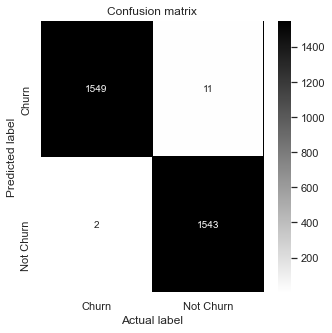

In [81]:
# REPRESENTING THE MODEL CLASSIFICATION IN TERMS OF CONFUSION MATRIX.

cm = metrics.confusion_matrix(y_test,y_test_pred)
print('The Confusion Matrix :\n',cm)
#print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")

colormap = plt.cm.binary
plt.figure(figsize=(5,5))
sns.heatmap(cm, xticklabels=['Churn', 'Not Churn'],yticklabels= ['Churn', 'Not Churn'], cmap=colormap, linecolor='black', linewidths =0.5,annot=True, fmt='g')

plt.title('Confusion matrix')
plt.ylabel('Predicted label')
plt.xlabel('Actual label')

The black cells on the diagonal represent the correct classifications, the white cells represent the incorrect classifications. As we can see, this gives a much more detailed overview of how our model is performing.

In the general case of a binary classification, we use the following terms for the 4 boxes:

**True Positive (TP):** The model predicted 1549 customers will Churn and who actually Churn.

**True Negative (TN)**: The model predicted 1543 customers will NOT Churn and who actually did NOT Churn.

**False Positive (FP)**: The model predicted  11 customers will Churn and who actually did NOT Churn. (TYPE I error)

**False Negative (FN):** The model predicted 2 customers will NOT Churn and who actually Churn.(TYPE II error)

# **6. Conclusion and improvisation:** 

• Write your conclusion on the results.

• Detailed suggestions or improvements or on quality, quantity, variety, velocity, veracity etc. on the data points collected by the telecom operator to perform a better data analysis in future.

# **Conclusion:**

## **Final Model uses : Random Forest Classifier**

## **Model Accuracy : 89 %** 

*   7 different Models were created to evaluate the model performance which resulted in the following accuracy scores.


1.   Decision Tree	0.858937
2.   Bagging Ensemble	0.872464
3.   Random Forest	0.885346
4.   Gradient Boost Ensemble	0.771337
5.   XGBoost	0.771014
6.   LightGBM	0.805475
7.   CatBoost	0.782287

*   From the analysis of various models, **Random Forest Classisfier has performed well** on the dataset with more accuracy and f1 score.

*   **GridsearchCV is used to tune the hyper-parameters** and cr**oss validation is also done** to avoid data leakage. The final model is tested on the test data and found to perform well.

*   We can also try a wider range of parameters in GridSearchCV because a little adjustment in a parameter may slighlty increase the model.


*   From random forest algorithm, **monthly contract, tenure and total charges are the most important predictor variables to predict churn.**

# **Improvisation:**

*   If the dataset contains **Equal samples** of both the classes better model can be build with higher accuracy, f1 score.

*   If we can **collect more data**, it is always helpful in improving the model.

*   **More information like customer's call history and international or local plans** opted will be added benefit for analyzing data.

## **Suggestions for Expanding the Business:**
*   **The company can target the Customers who have opted for TechSupport	and Internet Service, as their potential customers who will not churn.** 

*   **The company shall target to increase the tenure of contract of customers with them as it is observed that customers with more tenure, do not Churn.**

____________________________________END ________________________________________________






